Different components of an ML system:

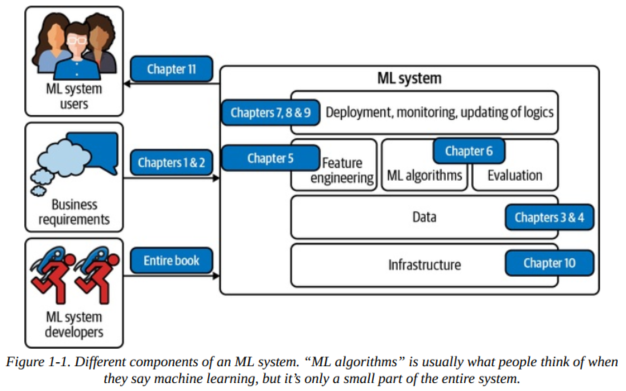

**MLOps:** a set of tools and best practices for bringing ML into production

**ML System:** considers an ML system holistically to ensure that all the components and their stakeholders can work together to satisfy the specified objectives and requirements

### 1. When to Use Machine Learning

Traditional Software vs. Machine Learning:

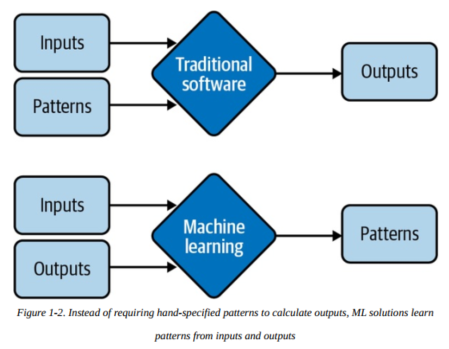


What ML solutions generally do:
 
*Machine learning is an approach to (1) learn (2) complex patterns from (3)
existing data and use these patterns to make (4) predictions on (5) unseen
data.*

1. **Learn: the system has the capacity to learn**
    - In most cases, ML systems learn from data. In supervised learning, based on example input and output pairs, ML systems learn how to generate outputs for arbitrary inputs.
2. **Complex patterns: there are patterns to learn, and they are complex**
    - Whether a pattern exists might not be obvious, or if patterns exist, your dataset or ML algorithms might not be sufficient to capture them. 
    - What is complex to machines is different from what is complex to humans. 
3. **Existing data: data is available, or it’s possible to collect data** 
    - ML learns from data, there must be data for it to learn from.
    - *Zero-shot learning*: it's possible for an ML system to make good predictions for a task without having been trained on data for that task.
    - *Continual learning*: ML models can be deployed without having been trained on any data, but they will learn from incoming data in production.
    - Without data and without continual learning, many companies follow a “fake-it-til-you make it” approach: launching a product that serves predictions made by humans, instead of ML models, with the hope of using the generated data to train ML models later.
4. **Predictions: it’s a predictive problem**
    - ML models make predictions, so they can only solve problems that require predictive answers. 
    - Instead of computing the exact outcome of a process, which might be even more computationally costly and timeconsuming than ML, you can frame the problem as: “What would the outcome of this process look like?” and approximate it using an ML model. The output will be an approximation of the exact output, but often, it’s good enough. 
5. **Unseen data: unseen data shares patterns with the training data**
    - The patterns your model learns from existing data are only useful if unseen data also share these patterns. In technical terms, it means your unseen data and training data should come from similar distributions. 
    - You might ask: “If the data is unseen, how do we know what distribution it comes from?” We don’t, but we can make assumptions—such as we can assume that users’ behaviors tomorrow won’t be too different from users’ behaviors today—and hope that our assumptions hold. If they don’t, we’ll have a model that performs poorly, which we might be able to find out with monitoring, as covered in Chapter 8, and test in production, as covered in Chapter 9.

ML solutions will especially shine if your problem has these additional following characteristics:
6. **It's repetitive**
    - Humans are great at few-shot learning: you can show kids a few pictures of cats and most of them will recognize a cat the next time they see one.
    - Despite exciting progress in few-shot learning research, most ML algorithms still require many examples to learn a pattern. When a task is repetitive, each pattern is repeated multiple times, which makes it easier for machines to learn it.
7. **The cost of wrong predictions is cheap**
    - ML is especially suitable when the cost of a wrong prediction is low. 
    - If one prediction mistake can have catastrophic consequences, ML might still be a suitable solution if, on average, the benefits of correct predictions outweigh the cost of wrong predictions. 
8. **It’s at scale**
    - It means making a lot of predictions.
    - A problem might appear to be a singular prediction, but it's actually a series of predictions.
    - Having a problem at scale also means that there’s a lot of data for you to collect, which is useful for training ML models.
9. **The patterns are constantly changing**
    - If your problem involves one or more constantly changing patterns, hardcoded solutions such as handwritten rules can become outdated quickly.
    - You can update your ML model with new data without having to figure out how the data has changed.
    -  It’s also possible to set up your system to adapt to the changing data distributions, an approach we’ll discuss in the section “Continual Learning”.

#### 1.1 Machine Learning Use Cases
Enterprise Machine Learning: 

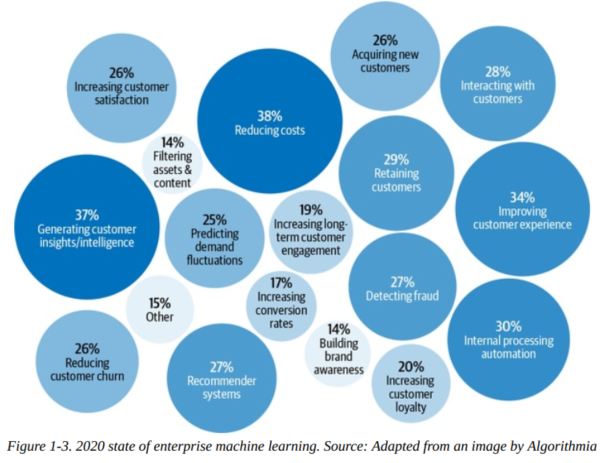

### 2 Understanding Machine Learning Systems

#### 2.1 Machine Learning in Research Versus in Production

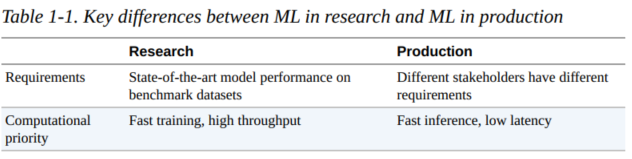

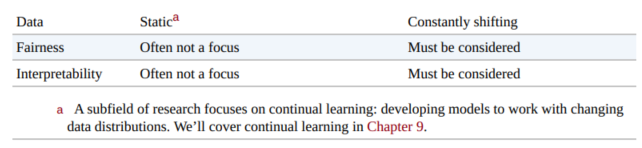

##### **Different stakeholders and requirements**

**Research**:

People involved in a research and leaderboard project often align on one single objective. The most common objective is model performance—develop a model that achieves the  small improvement in performance, researchers often resort to techniques that make models too complex to be useful.

**Production**:

There are many stakeholders involved in bringing an ML system into production. Each stakeholder has their own requirements. Having different, often conflicting, requirements can make it difficult to design, develop, and select an ML model that satisfies all the requirements.

Consider a mobile app that recommends restaurants to users. The app makes
money by charging restaurants a 10% service fee on each order. This means that
expensive orders give the app more money than cheap orders. The project
involves ML engineers, salespeople, product managers, infrastructure engineers,
and a manager:

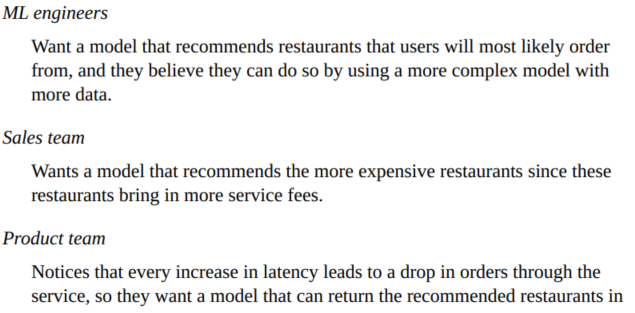

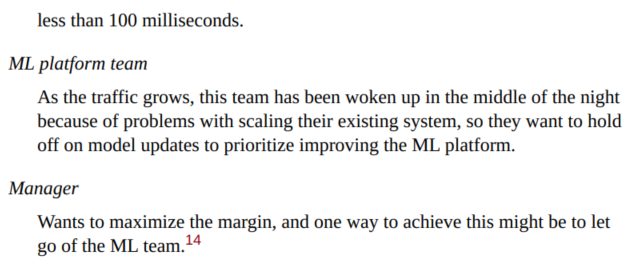

When developing an ML project, it’s important for ML engineers to understand requirements from all stakeholders involved and how strict these requirements are. 

For many tasks, a small improvement in performance can result in a huge boost
in revenue or cost savings. For example, a 0.2% improvement in the clickthrough rate for a product recommender system can result in millions of dollars
increase in revenue for an ecommerce site. However, for many tasks, a small
improvement might not be noticeable for users. For the second type of task, if a
simple model can do a reasonable job, complex models must perform
significantly better to justify the complexity.

##### **Computational priorities**

- During model deployment, training is the bottleneck.
- Once the model has been deployed, however, its job is to generate predictions, so inference is the bottleneck.
- Research usually prioritizes fast training (high throughput), whereas production usually prioritizes fast inference (low latency).
- If your system always processes one query at a time, higher latency means lower throughput. 
- Most modern distributed systems batch queries to process them together, often concurrently, higher latency might also mean higher throughput.

The difference in latency and throughput trade-off for processing queries one at a time and processing queries in batches:

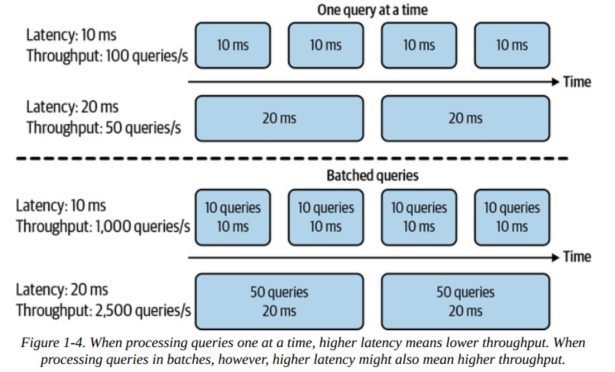

This is even more complicated if you want to batch online queries. Batching requires your system to wait for enough queries to arrive in a batch before processing them, which further increases latency.

When thinking about latency, it’s important to keep in mind that **latency is not an individual number but a distribution**. It’s usually better to think in percentiles, as they tell you something about a certain percentage of your requests. The most common percentile is the 50th percentile, abbreviated as p50. It’s also known as the **median**. If the median is 100 ms, half of the requests take longer than 100 ms, and half of the requests take less than 100 ms. **Higher percentiles also help you discover outliers**, which might be symptoms of something wrong. Typically, the percentiles you’ll want to look at are p90, p95, and p99. The 90th percentile (p90) for the 10 requests above is 3,000 ms, which is an outlier.

It’s a common practice to **use high percentiles to specify the performance requirements for your system**; for example, a product manager might specify that the 90th percentile or 99.9th percentile latency of a system must be below a certain number.

##### **Data**

**Research**:

The datasets you work with are often clean and wellformatted, freeing you to focus on developing models. They are static by nature
so that the community can use them to benchmark new architectures and techniques. 

**Production**:

- It’s noisy, possibly unstructured, constantly shifting. 
- It’s likely biased, and you likely don’t know how it’s biased. Labels, if there are any, might be sparse, imbalanced, or incorrect. 
- Changing project or business requirements might require updating some or all of your existing labels. 
- If you work with users’ data, you’ll also have to worry about privacy and regulatory concerns.

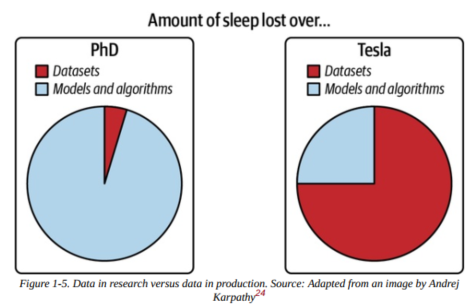

##### **Fairness**

During the research phase, a model is not yet used on people, so it’s easy for researchers to put off fairness as an afterthought: “Let’s try to get state of the art first and worry about fairness when we get to production.” When it gets to production, it’s too late. If you optimize your models for better accuracy or lower latency, you can show that your models beat state of the art. But, as of writing this book, there’s no equivalent state of the art for fairness metrics.

ML algorithms don’t predict the future, but encode the past, thus perpetuating the biases in the data and more. When ML algorithms are deployed at scale, they can discriminate against people at scale. If a human operator might only make sweeping judgments about a few individuals at a time, an ML algorithm can make sweeping judgments about millions in split seconds. This can especially hurt members of minority groups because misclassification on them could only have a minor effect on models’ overall performance metrics.

##### **Interpretability**

In early 2020, the Turing Award winner Professor Geoffrey Hinton proposed a heatedly debated question about the importance of interpretability in ML systems. “Suppose you have cancer and you have to choose between a black box AI surgeon that cannot explain how it works but has a 90% cure rate and a human surgeon with an 80% cure rate. Do you want the AI surgeon to be illegal?”.

Since most ML research is still evaluated on a single objective, modelperformance, researchers aren’t incentivized to work on model interpretability. However, interpretability isn’t just optional for most ML use cases in the industry, but a requirement.

Why ML interpretability is important:
1. For users (business leaders and end users), to understand why a decision is made so that they can trust a model and detect potential biases.
2. For developers, to be able to debug and improve a model.

#### 2.2 Machine Learning Systems Versus Traditional Software

Since ML is part of software engineering (SWE), and software has been successfully used in production for more than half a century, some might wonder why we don’t just take tried-and-true best practices in software engineering and apply them to ML. That’s an excellent idea. In fact, ML production would be a much better place if ML experts were better software engineers. Many traditional SWE tools can be used to develop and deploy ML applications. **However, many challenges are unique to ML applications and require their own tools**.

**SwE**:
- Underlying assumption that code and data are separated. In fact, in SwE, we want to keep things as modular and separate as possible. 
- You only need to focus on testing and versioning your code.

**ML Systems**:
- ML systems are part code, part data, and part artifacts created from the two.
- We have to test and version our data too, and that’s the hard part. How to version large datasets? How to know if a data sample is good or bad for your system? 
- Not all data samples are equal—some are more valuable to your model than others.
- Indiscriminately accepting all available data might hurt your model’s performance and even make it susceptible to data poisoning attacks.
- The size of ML models is another challenge. As of 2022, it’s common for ML models to have hundreds of millions, if not billions, of parameters, which requires gigabytes of random-access memory (RAM) to load them into memory. Getting these large models into production, especially on edge devices, is a massive engineering challenge.
- Monitoring and debugging these models in production is also nontrivial. As ML models get more complex, coupled with the lack of visibility into their work, it’s hard to figure out what went wrong or be alerted quickly enough when things go wrong.
